<a href="https://colab.research.google.com/github/KhalilPendari/DSML-Git2/blob/main/walmart_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')


In [3]:
df=pd.read_csv('/content/walmart_data.txt')
df.head( )


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,7969.0


In [4]:
shape=df.shape
print(f'Total no of rows: {shape[0]}')
print(f'Total no of columns: {shape[1]}')


Total no of rows: 325566
Total no of columns: 10


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325566 entries, 0 to 325565
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     325566 non-null  int64  
 1   Product_ID                  325566 non-null  object 
 2   Gender                      325566 non-null  object 
 3   Age                         325566 non-null  object 
 4   Occupation                  325565 non-null  float64
 5   City_Category               325565 non-null  object 
 6   Stay_In_Current_City_Years  325565 non-null  object 
 7   Marital_Status              325565 non-null  float64
 8   Product_Category            325565 non-null  float64
 9   Purchase                    325565 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 24.8+ MB


In [6]:
df.isna().sum(axis=0)

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,1
City_Category,1
Stay_In_Current_City_Years,1
Marital_Status,1
Product_Category,1
Purchase,1


No null value present in the data

In [7]:
df.duplicated().sum()

np.int64(0)

No duplicated values presented in the table

In [8]:
df['User_ID'].value_counts()

,count
User_ID,
1001680,675
1004277,579
1001941,553
1001181,547
1000889,546
...,...
1004570,3
1005110,3
1000341,3


Most number of orders have been done by the customer_id 1001680

In [9]:
df['User_ID'].nunique()

5891

There are 5891 unique user_ids are present in the data

In [10]:
df['Product_ID'].value_counts()

,count
Product_ID,
P00265242,1082
P00025442,1008
P00110742,967
P00112142,950
P00057642,898
...,...
P00006642,1
P00162742,1
P00039342,1


Most number of orders have been placed for the product_id P00265242. A total of 1880 orders have been recieved for the product_id P00265242.

3631 unique producLids present in the data

In [11]:
gender_wise_pur=df['Gender'].value_counts()
gender_wise_pur

,count
Gender,
M,245458
F,80108


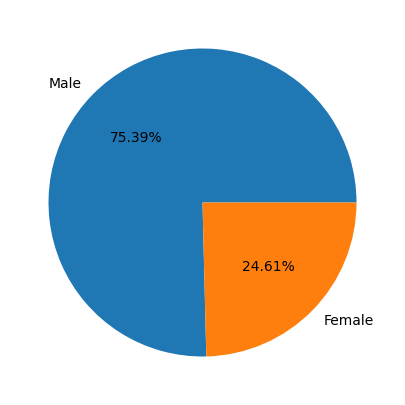

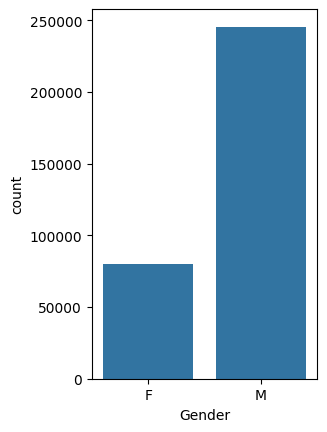

In [12]:
# purchases based on gender


plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.pie(gender_wise_pur.values,labels=['Male','Female'],autopct='%.2f%%')
plt.show()

plt.subplot(1,2,2)
sns.countplot(x=df['Gender'])
plt.show()


75.31% of customers of walmart are male customers. Rest 24.69% are female customers. Men prefer walmart store more than female with the total number orders being placed 414259.

In [13]:
df['Age'].value_counts()

,count
Age,
26-35,129540
36-45,64993
18-25,59759
46-50,26822
51-55,22774
55+,12692
0-17,8986


In [14]:
# bar plot for age related distribution

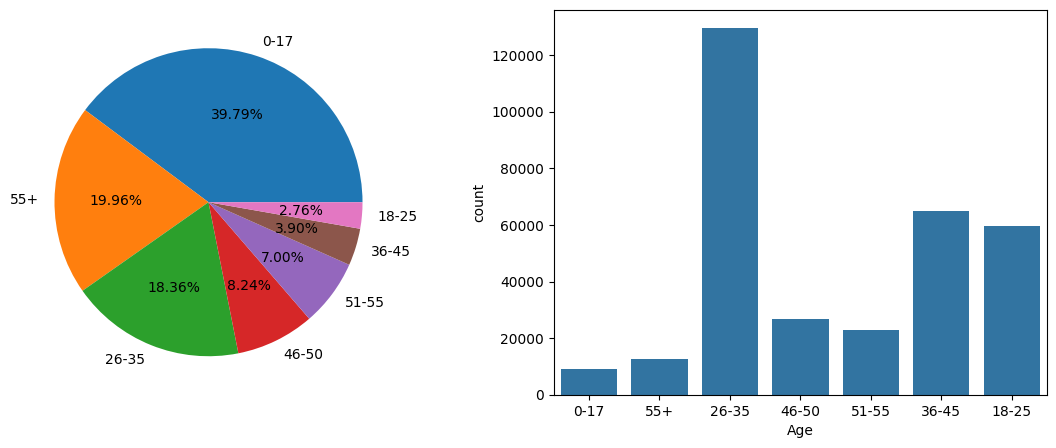

In [15]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.pie(df['Age'].value_counts().values,labels=df['Age'].unique(),autopct='%.2f%%')
plt.subplot(1,2,2)
sns.countplot(x=df['Age'])
plt.show()


The customers are divided into 7 age groups according to their age.

customers aging between 26-35 are prefering walmart store a lot than other age group customers.

40% of the buyers fall under the age group of 26-35 which is the highest amongst all age groups.

Approximately 0.22 million records are present for age group 26-35 followed by 0.11 million records for group 36-45.

Age group 0-17 and 55+ are the least frequent buyers which is only 3%(15102) and 4%(21504) of the data respectively.

We can observe that most buyers are in within the age of 18-45 before and after this range we can see less buyers.


In [16]:
df['Occupation'].value_counts()

,count
Occupation,
4.0,42978
0.0,41246
7.0,34955
1.0,28015
17.0,23631
20.0,20073
12.0,18197
14.0,16048
2.0,15753


In [17]:
df['Occupation'].nunique()

21

21 unique occupation are there.

The occupation type 4 is having highest number of orders with order count 72308.


In [18]:
df['City_Category'].value_counts()

,count
City_Category,
B,137172
C,100559
A,87834


Walmart is having customers from 3 different cities.

Among them city B customers are having highest number purchases from walmart store.


ValueError: 'labels' must be of length 'x', not 4

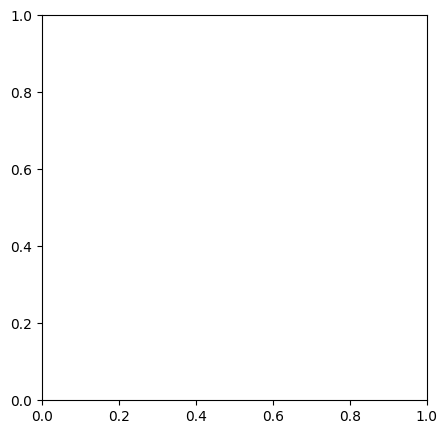

In [22]:
# based on city category
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.pie(df['City_Category'].value_counts().values,labels=df['City_Category'].unique(),autopct='%.2f%%')

plt.subplot(1,2,2)
sns.countplot(x=df['City_Category'])
plt.show()



Buyers from city B is 42.03% in proportion while from A and C are 26.85% and 31.13% respectively Based on Purcha


In [25]:
df['Marital_Status'].value_counts()

,count
Marital_Status,
0.0,192002
1.0,133563


Here 0 means unmarried. 1 means married.

unmarried customers are more than the married customers.


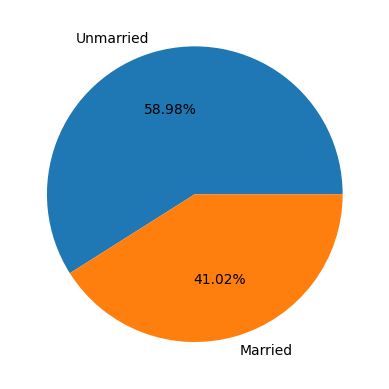

In [26]:
# plotting pie chart based on marital_status


plt.pie(df['Marital_Status'].value_counts().values,labels=['Unmarried', 'Married'],autopct='%.2f%%')
plt.show( )


walmart is having 59.03% unmarried customers and remaining 40.97% are married customers.

In [27]:
df['Product_Category'].value_counts( )

,count
Product_Category,
5.0,90142
1.0,83627
8.0,67958
11.0,14454
2.0,14261
3.0,12135
6.0,12022
4.0,7087
16.0,5893


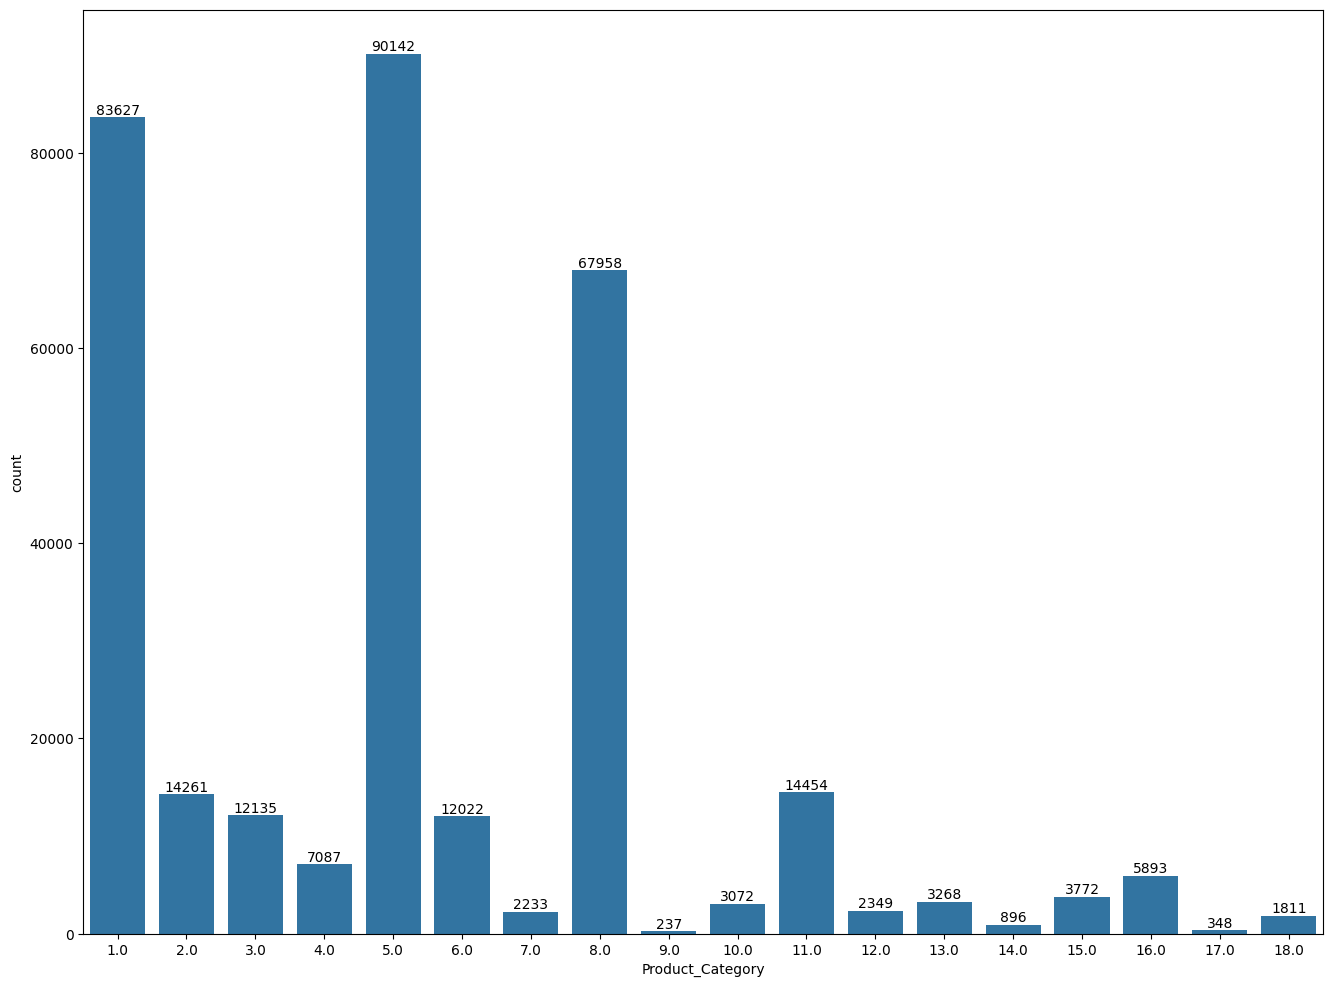

In [28]:
plt.figure(figsize=(16,12))
prod_cat=sns.countplot(x=df['Product_Category'])
for i in prod_cat.containers:
  prod_cat.bar_label(i)
plt.show()


From the above plot we can colclude that:

walmart is having 20 unique product categories.

Most frequent categories of the product which was bought are 5,1,8 in descreasing order.

And least categories of the product which was bought are 19,17,14 in ascending order


In [29]:
df.head( )

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,7969.0


In [30]:
df.describe(include=['object'])

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,325566,325566,325566,325565,325565
unique,3533,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1082,245458,129540,137172,114517


Product_ID:'P00265242' is the most frequent product purchased by customers with '1880' frequency.

Gender:'Male' Most of the users are Male with '414259' counts.

Age: '26-35' is the most frequent customers Age group with frequency '219587'.

City_Category: Customers from 'City_Category:B' made most of the transactions.


In [31]:
df.groupby(['Gender'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,80107.0,8808.903754,4715.078038,186.0,5460.0,7931.0,11442.0,23948.0
M,245458.0,9492.259531,5045.881787,185.0,5901.0,8109.0,12498.0,23961.0


In [32]:
df.groupby(['Marital_Status'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
0.0,192002.0,9317.600692,4979.385235,185.0,5849.0,8053.0,12066.0,23961.0
1.0,133563.0,9333.482514,4969.270265,186.0,5891.0,8068.0,12063.0,23961.0


In [33]:
df.groupby(['Age'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
0-17,8986.0,9053.352326,5096.625215,197.0,5357.0,8027.5,11978.75,23953.0
18-25,59759.0,9215.207902,4987.757778,197.0,5434.0,8033.0,12033.00,23958.0
26-35,129540.0,9303.959233,4968.132205,185.0,5833.0,8041.0,12055.00,23961.0
36-45,64993.0,9392.311680,4976.722875,186.0,5914.0,8071.0,12111.00,23949.0
46-50,26822.0,9273.669898,4905.457634,186.0,5925.0,8049.0,12015.00,23960.0
51-55,22773.0,9634.980591,5027.782627,216.0,6067.0,8217.0,12620.00,23939.0
55+,12692.0,9433.949023,4913.692726,187.0,6097.0,8119.5,11932.25,23960.0


In [34]:
df.groupby(['City_Category'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
City_Category,,,,,,,,
A,87834.0,8942.022839,4869.636268,185.0,5412.0,7936.0,11789.75,23961.0
B,137172.0,9187.816194,4910.592781,186.0,5480.0,8014.0,11988.25,23960.0
C,100559.0,9843.784604,5109.828755,187.0,6097.0,8621.0,13265.00,23961.0


There are more single people than married people.

Most of the customers are between the ages of 26 and 35.

The majority of our customers come from city category B but customers come from City category C spent more as mean is 9719.

Male customers tend to spend more than female customers, as the mean is higher for male customers.

The majority of users come from City Category C, but more people from City Category B tend to purchase, which suggests the same users visit the outlet multiple times in City Category B.


Univariate analysis

Based on Gender and Purchase Habits

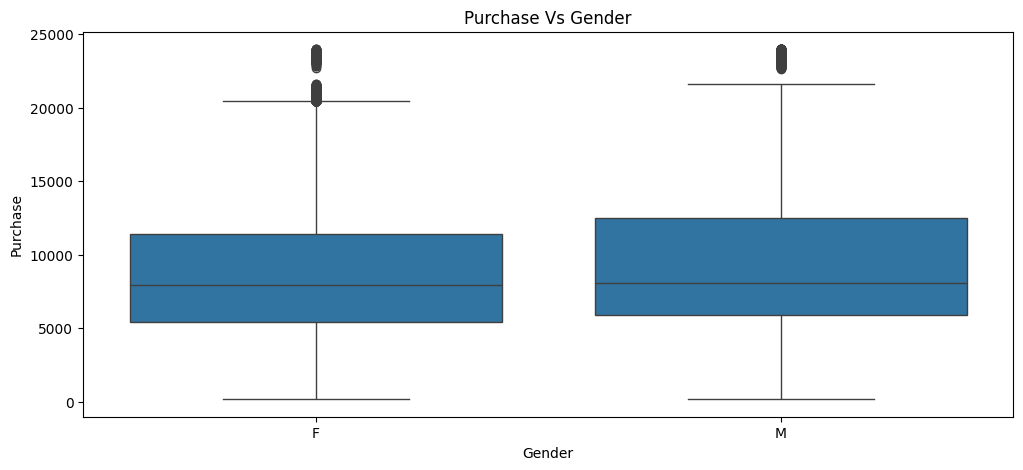

In [35]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df,x='Gender',y='Purchase')
plt.title('Purchase Vs Gender')
plt.show()


Above figure shows that Male spending behaviour is more than Females

In [36]:
# Purchase Habit Based on Age Gnoup

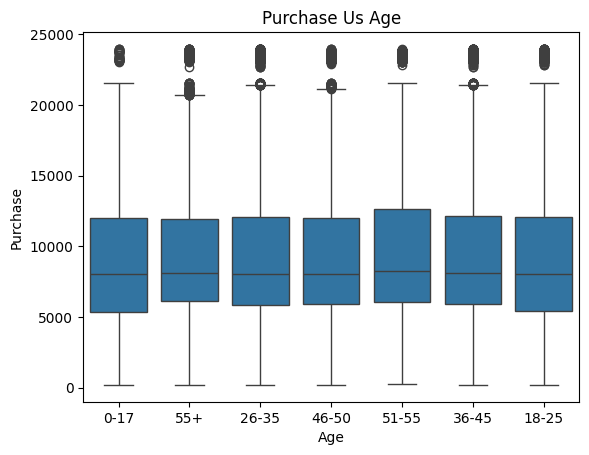

In [37]:
sns.boxplot(data=df,x='Age',y='Purchase')
plt.title('Purchase Us Age')
plt.show()


Above figure shows there is no significance different in purchase habits based on age group

Purchase Habits based on occupation

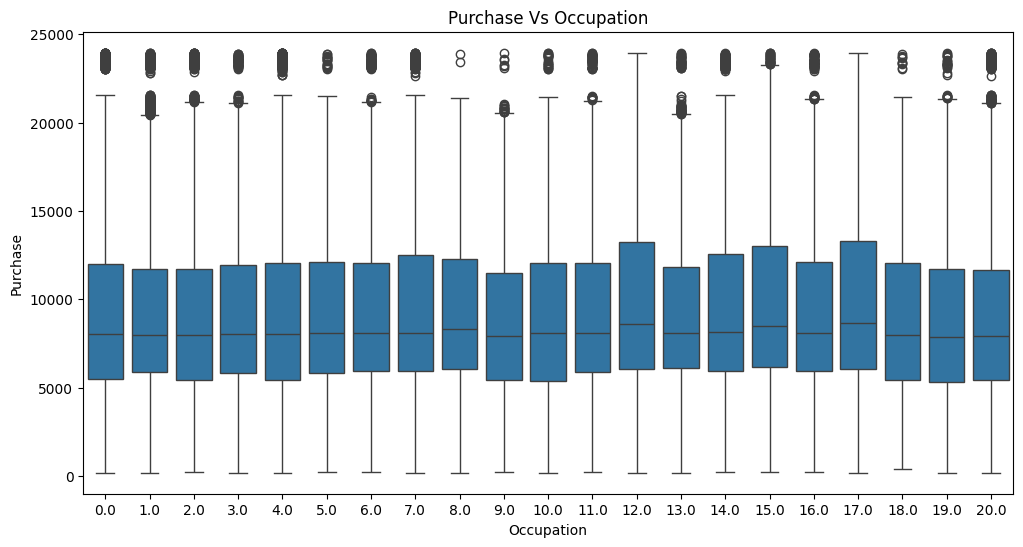

In [38]:
plt.figure(figsize = (12,6))
sns.boxplot(data=df,x='Occupation',y='Purchase')
plt.title('Purchase Vs Occupation')
plt.show()


Purchase habit based on City Category

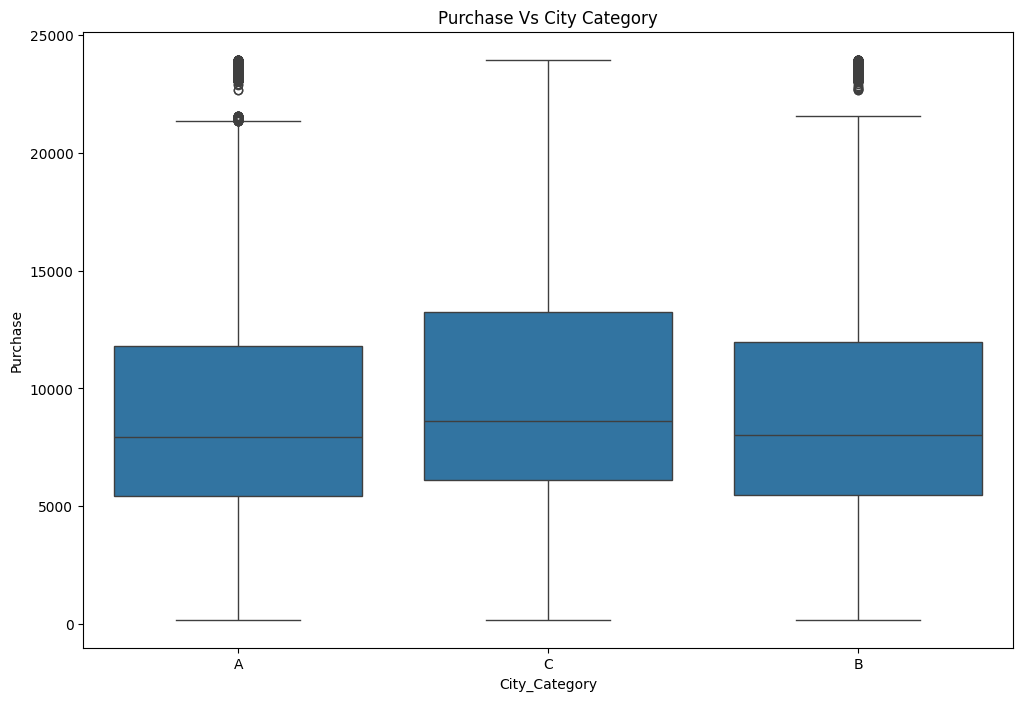

In [39]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df,x='City_Category',y='Purchase')
plt.title('Purchase Vs City Category')
plt.show()

City "C" has higher median value for purchase hence higher spending habit followed by B and A

City "C" has no outliers compare to "B" and "A"

Purchase habit based on stay year in city

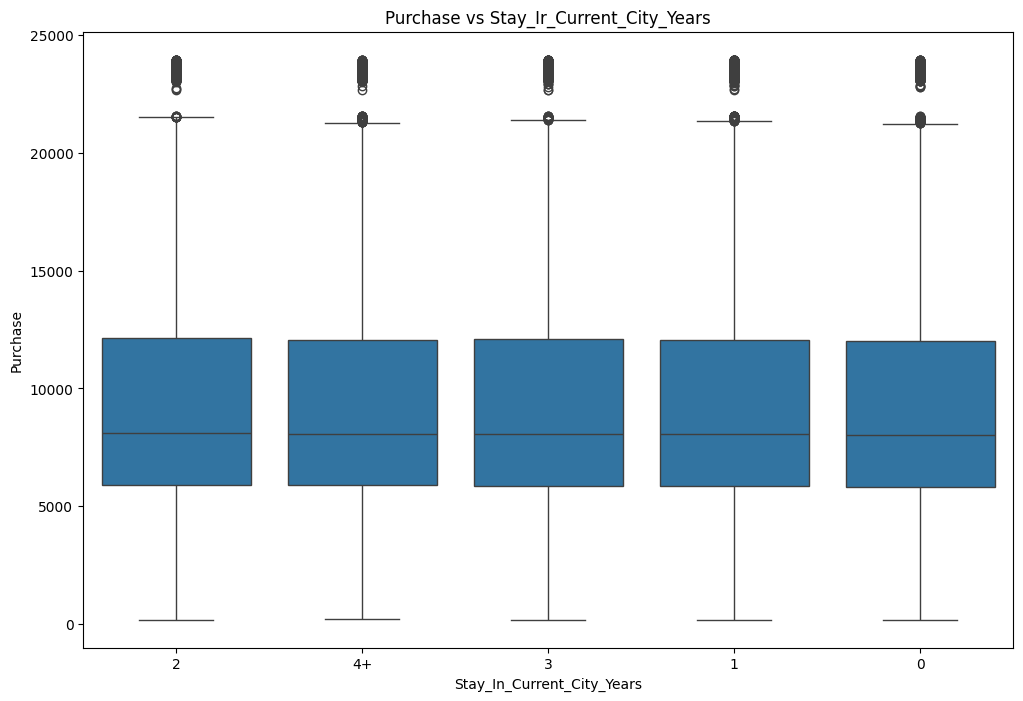

In [40]:
plt.figure(figsize = (12,8))
sns.boxplot(data = df, y ='Purchase', x = 'Stay_In_Current_City_Years')
plt.title('Purchase vs Stay_Ir_Current_City_Years')
plt.show()


Above figure shows that the median, maximum order value and minimum order values for all the cities are almost same, hence we can say that stays in year in cities has almost negligible impact on purchasing behaviour.

Purchase habit based on Product categories



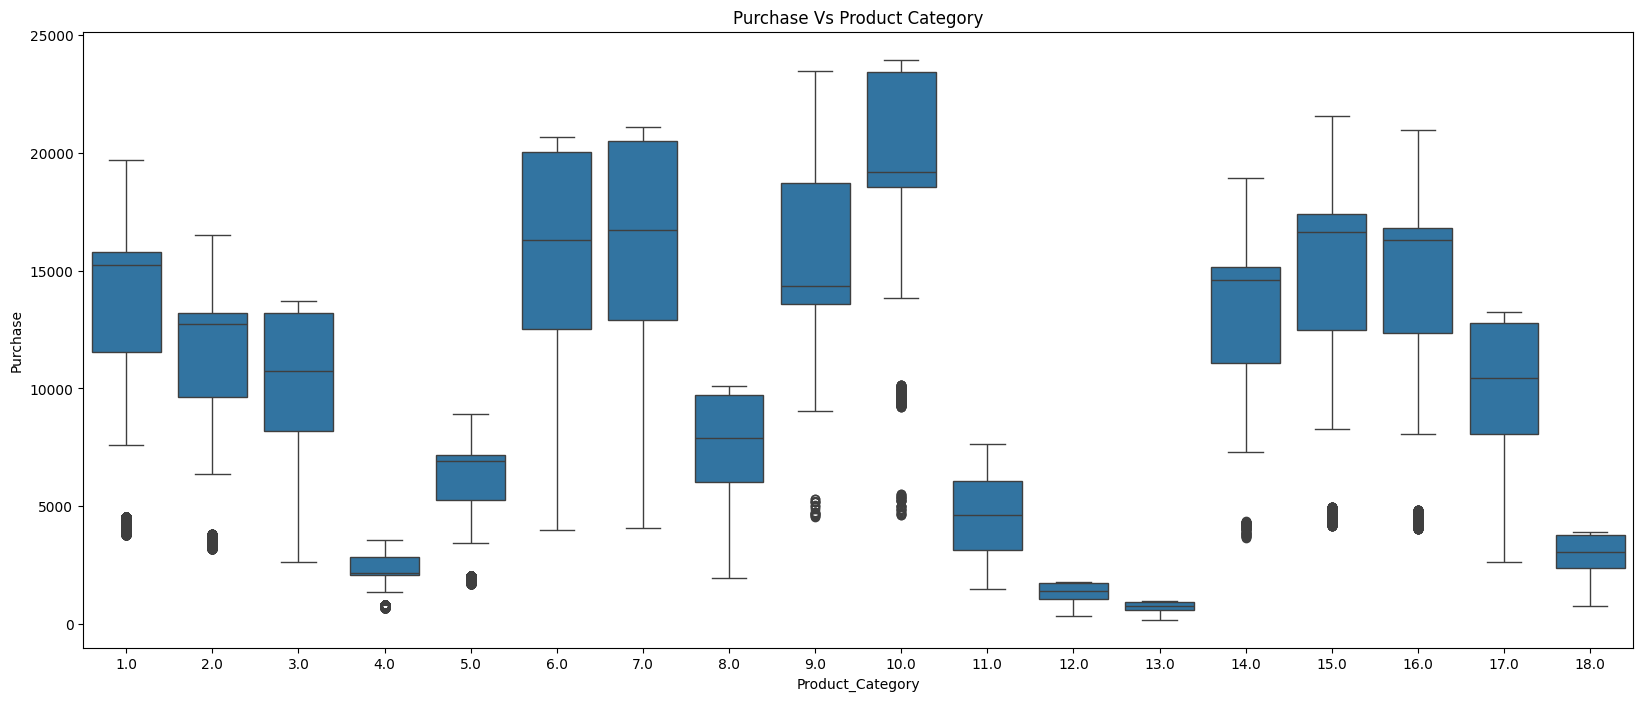

In [41]:
plt.figure(figsize=(20,8))
sns.boxplot(data=df,x='Product_Category',y='Purchase')
plt.title('Purchase Vs Product Category')
plt.show()

Above data and figure shows that product category 10 and 19 are the most and least preferred respectively while purchasing.

Central Limit Theorem

In [42]:
from scipy.stats import norm
from scipy import stats

In [43]:
male_data=df[df['Gender']=='M']
male_data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,7969.0
5,1000003,P00193542,M,26-35,15.0,A,3,0.0,1.0,15227.0
6,1000004,P00184942,M,46-50,7.0,B,2,1.0,1.0,19215.0
7,1000004,P00346142,M,46-50,7.0,B,2,1.0,1.0,15854.0
8,1000004,P0097242,M,46-50,7.0,B,2,1.0,1.0,15686.0
...,...,...,...,...,...,...,...,...,...,...
325552,1002071,P00295942,M,46-50,7.0,C,1,1.0,2.0,9554.0
325553,1002071,P00060242,M,46-50,7.0,C,1,1.0,3.0,8108.0
325554,1002071,P00186642,M,46-50,7.0,C,1,1.0,2.0,13147.0
325555,1002071,P00358442,M,46-50,7.0,C,1,1.0,1.0,11425.0


In [44]:
female_data=df[df['Gender']=='F']
female_data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,1057.0
14,1000006,P00231342,F,51-55,9.0,A,1,0.0,5.0,5378.0
...,...,...,...,...,...,...,...,...,...,...
325561,1002072,P00044442,F,51-55,12.0,C,1,0.0,1.0,15477.0
325562,1002072,P00199642,F,51-55,12.0,C,1,0.0,16.0,12551.0
325563,1002072,P00302642,F,51-55,12.0,C,1,0.0,16.0,12179.0
325564,1002072,P00321442,F,51-55,12.0,C,1,0.0,13.0,771.0


In [45]:
male_means=[]
female_means=[]
for i in range(1000):
  male_mean=male_data['Purchase'].sample(1000).mean()
  female_mean=female_data['Purchase'].sample(1000).mean()
  male_means.append(male_mean)
  female_means.append(female_mean)


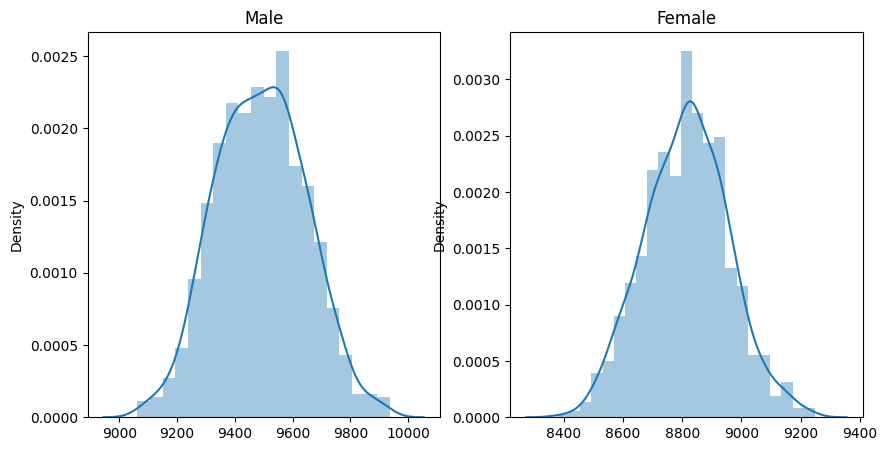

In [46]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(male_means)
plt.title('Male')
plt.subplot(1,2,2)
sns.distplot(female_means)
plt.title('Female')
plt.show()

1. The means sample seems to be normally distributed for both males and females. Also, we can see the mean of the sample means are
closer to the population mean as per central limit theorem.


In [47]:
#Taking the values for z at 90%, 95% and 99% confidence interval as:

In [48]:
Z_value_90_perc=norm.ppf(0.90)
Z_value_90_perc

np.float64(1.2815515655446004)

calculating 90% confidence interval for 1000 samples:

In [49]:
print('Avg spend of male population:',np.mean(male_data['Purchase']))
print('Avg spend of female population:',np.mean(female_data['Purchase']))
print('Standard deviation of male population:',np.std(male_data['Purchase']))
print('Standard deviation of female population:',np.std(female_data['Purchase']))
male_Standard_of_error=np.std(male_data['Purchase'])/np.sqrt(1000)
print('Standard of error:',male_Standard_of_error)
female_Standard_of_error=np.std(female_data['Purchase'])/np.sqrt(1000)
print('Standard of erron:',female_Standard_of_error)



Upper_Limit_male=Z_value_90_perc*male_Standard_of_error+np.mean(male_means)
Lower_Limit_male=np.mean(male_means)-Z_value_90_perc*male_Standard_of_error

Upper_limit_female=Z_value_90_perc*female_Standard_of_error+np.mean(female_means)
Lower_limit_female=np.mean(female_means)-Z_value_90_perc*female_Standard_of_error

print('90% confidence interval for male population:',Lower_Limit_male,'to',Upper_Limit_male)
print('90% confidence interval fon female population:',Lower_limit_female,'to',Upper_limit_female)



Avg spend of male population: 9492.259531162154
Avg spend of female population: 8808.903753729386
Standard deviation of male population: 5045.87150893156
Standard deviation of female population: 4715.048607937131
Standard of error: 159.56446748774383
Standard of erron: 149.10292879487605
90% confidence interval for male population: 9286.04927788579 to 9695.029464114208
90% confidence interval fon female population: 8623.357775698163 to 9005.523959346881


Calculating 95% confidence interval for sample size 1000:

In [50]:
Z_value_95_perc=norm.ppf(0.95)
Z_value_95_perc

np.float64(1.6448536269514722)

In [51]:
print('Avg spend of male population:',np.mean(male_data['Purchase']))
print('Avg spend of female population:',np.mean(female_data['Purchase']))
print('Standard deviation of male population:',np.std(male_data['Purchase']))
print('Standard deviation of female population:',np.std(female_data['Purchase']))
male_Standard_of_error=np.std(male_data['Purchase'])/np.sqrt(1000)
print('Standard of error:',male_Standard_of_error)
female_Standard_of_error=np.std(female_data['Purchase'])/np.sqrt(1000)
print('Standard of erron:',female_Standard_of_error)



Upper_Limit_male=Z_value_95_perc*male_Standard_of_error+np.mean(male_means)
Lower_Limit_male=np.mean(male_means)-Z_value_95_perc*male_Standard_of_error

Upper_limit_female=Z_value_95_perc*female_Standard_of_error+np.mean(female_means)
Lower_limit_female=np.mean(female_means)-Z_value_95_perc*female_Standard_of_error

print('95% confidence interval for male population:',Lower_Limit_male,'to',Upper_Limit_male)
print('95% confidence intenval fon female population:',Lower_limit_female,'to',Upper_limit_female)


Avg spend of male population: 9492.259531162154
Avg spend of female population: 8808.903753729386
Standard deviation of male population: 5045.87150893156
Standard deviation of female population: 4715.048607937131
Standard of error: 159.56446748774383
Standard of erron: 149.10292879487605
95% confidence interval for male population: 9228.079177920203 to 9752.999564079795
95% confidence intenval fon female population: 8569.188374305184 to 9059.69336073986


Calculating 99% confidence interval for sample size 1000:

In [52]:
Z_value_99_perc=norm.ppf(0.99)
Z_value_99_perc

np.float64(2.3263478740408408)

In [53]:
print('Avg spend of male population:',np.mean(male_data['Purchase']))
print('Avg spend of female population:',np.mean(female_data['Purchase']))
print('Standard deviation of male population:',np.std(male_data['Purchase']))
print('Standard deviation of female population:',np.std(female_data['Purchase']))
male_Standard_of_error=np.std(male_data['Purchase'])/np.sqrt(1000)
print('Standard of error:',male_Standard_of_error)
female_Standard_of_error=np.std(female_data['Purchase'])/np.sqrt(1000)
print('Standard of error:',female_Standard_of_error)



Upper_Limit_male=Z_value_99_perc*male_Standard_of_error+np.mean(male_means)
Lower_Limit_male=np.mean(male_means)-Z_value_99_perc*male_Standard_of_error

Upper_limit_female=Z_value_99_perc*female_Standard_of_error+np.mean(female_means)
Lower_limit_female=np.mean(female_means)-Z_value_99_perc*female_Standard_of_error

print('99% confidence interval for male population:',Lower_Limit_male,'to',Upper_Limit_male)
print('99% confidence intenval fon female population:',Lower_limit_female,'to',Upper_limit_female)



Avg spend of male population: 9492.259531162154
Avg spend of female population: 8808.903753729386
Standard deviation of male population: 5045.87150893156
Standard deviation of female population: 4715.048607937131
Standard of error: 159.56446748774383
Standard of error: 149.10292879487605
99% confidence interval for male population: 9119.336911287428 to 9861.74183071257
99% confidence intenval fon female population: 8467.5755861073 to 9161.306148937745


Observation:
Now using the Confidence interval at 99%, we can say that:

Average amount spend by male customers lie in the range 9058.518713642456 - 9807.737064357547

Average amount spend by female customers lie in range 8385.639530449498 - 9087.045503550504


Calculating 90% confidence interval for sample size 1500:

In [55]:
male_means_1500=[]
female_means_1500=[]
for i in range(1000):
  male_mean_1500=male_data['Purchase'].sample(1500).mean()
  female_mean_1500=female_data['Purchase'].sample(1500).mean()
  male_means_1500.append(male_mean_1500)
  female_means_1500.append(female_mean_1500)


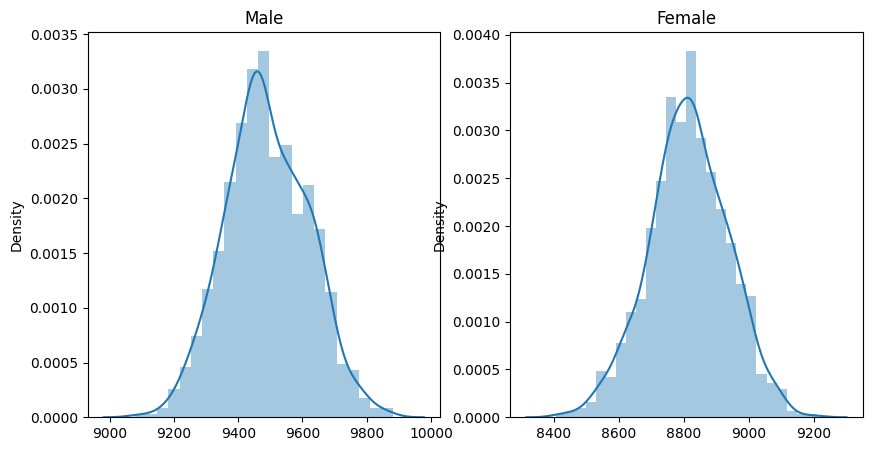

In [56]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(male_means_1500)
plt.title('Male')
plt.subplot(1,2,2)
sns.distplot(female_means_1500)
plt.title('Female')
plt.show()


In [60]:
Z_value_90_perc=norm.ppf(0.90)
Z_value_90_perc

np.float64(1.2815515655446004)

In [62]:
print('Avg spend of male population:',np.mean(male_data['Purchase']))
print('Avg spend of female population:',np.mean(female_data['Purchase']))
print('Standard deviation of male population:',np.std(male_data['Purchase']))
print('Standard deviation of female population:',np.std(female_data['Purchase']))
ma1e_Standard_of_error=np.std(male_data['Purchase'])/np.sqrt(1500)
print('Standard of error:',male_Standard_of_error)
female_Standand_of_error=np.std(female_data['Purchase'])/np.sqrt(1500)
print('Standard of error:',female_Standard_of_error)



Upper_Limit_male=Z_value_90_perc*male_Standard_of_error+np.mean(male_means)
Lower_Limit_male=np.mean(male_means)-Z_value_90_perc*male_Standard_of_error

Upper_limit_female=Z_value_90_perc*female_Standard_of_error+np.mean(female_means)
Lower_limit_female=np.mean(female_means)-Z_value_90_perc*female_Standard_of_error

print('90% confidence intenval fon male population:',Lower_Limit_male,'to',Upper_Limit_male)
print('90% confidence interval for female population:',Lower_limit_female,'to',Upper_limit_female)


Avg spend of male population: 9492.259531162154
Avg spend of female population: 8808.903753729386
Standard deviation of male population: 5045.87150893156
Standard deviation of female population: 4715.048607937131
Standard of error: 159.56446748774383
Standard of error: 149.10292879487605
90% confidence intenval fon male population: 9286.04927788579 to 9695.029464114208
90% confidence interval for female population: 8623.357775698163 to 9005.523959346881


Calculating 95% confidence interval for sample size 1500:

In [66]:
print('Avg spend of male population:',np.mean(male_data['Purchase']))
print('Avg spend of female population:',np.mean(female_data['Purchase']))
print('Standard deviation of male population:',np.std(male_data['Purchase']))
print('Standard deviation of female population:',np.std(female_data['Purchase']))
male_Standard_of_error=np.std(male_data['Purchase'])/np.sqrt(1500)
print('Standard of erron:',male_Standard_of_error)
female_Standard_of_error=np.std(female_data['Purchase'])/np.sqrt(1500)
print('Standard of erron:',female_Standand_of_error)




Upper_Limit_male=Z_value_95_perc*male_Standard_of_error+np.mean(male_means)
Lower_Limit_male=np.mean(male_means)-Z_value_95_perc*male_Standard_of_error

Upper_limit_female=Z_value_95_perc*female_Standard_of_error+np.mean(female_means)
Lower_limit_female=np.mean(female_means)-Z_value_95_perc*female_Standard_of_error

print('95% confidence interval for male population:',Lower_Limit_male,'to',Upper_Limit_male)
print('95% confidence interval for female population:',Lower_limit_female,'to',Upper_limit_female)


Avg spend of male population: 9492.259531162154
Avg spend of female population: 8808.903753729386
Standard deviation of male population: 5045.87150893156
Standard deviation of female population: 4715.048607937131
Standard of erron: 130.28384214129613
Standard of erron: 121.74203156732649
95% confidence interval for male population: 9276.241520720714 to 9704.837221279284
95% confidence interval for female population: 8614.193045346565 to 9014.68868969848


Calculating 99% confidence interval for sample size 1500:

In [67]:
Z_value_99_perc=norm.ppf(0.99)
Z_value_99_perc

np.float64(2.3263478740408408)

In [68]:
print('Avg spend of male population:',np.mean(male_data['Purchase']))
print('Avg spend of female population:',np.mean(female_data['Purchase']))
print('Standard deviation of male population:',np.std(male_data['Purchase']))
print('Standard deviation of female population:',np.std(female_data['Purchase']))
male_Standard_of_error=np.std(male_data['Purchase'])/np.sqrt(1500)
print('Standard of error:',male_Standard_of_error)
female_Standard_of_error=np.std(female_data['Purchase'])/np.sqrt(1500)
print('Standard of error:',female_Standard_of_error)



Upper_Limit_male=Z_value_99_perc*male_Standard_of_error+np.mean(male_means)
Lower_Limit_male=np.mean(male_means)-Z_value_99_perc*male_Standard_of_error

Upper_limit_female=Z_value_99_perc*female_Standard_of_error+np.mean(female_means)
Lower_limit_female=np.mean(female_means)-Z_value_99_perc*female_Standard_of_error

print('99% confidence interval for male population:',Lower_Limit_male,'to',Upper_Limit_male)
print('99% confidence interval for female population:',Lower_limit_female,'to',Upper_limit_female)



Avg spend of male population: 9492.259531162154
Avg spend of female population: 8808.903753729386
Standard deviation of male population: 5045.87150893156
Standard deviation of female population: 4715.048607937131
Standard of error: 130.28384214129613
Standard of error: 121.74203156732649
99% confidence interval for male population: 9187.453831812722 to 9793.624910187276
99% confidence interval for female population: 8531.22655120446 to 9097.655183840585


Observations:

By increasing the sample size we can see confidence interval is more closer to the population mean.


In [71]:
# Confidence Interval for marital_status

unmarried_data=df[df['Marital_Status']==0]
unmarried_data.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,7969.0


In [73]:
married_data=df[df['Marital_Status']==1]
married_data


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
6,1000004,P00184942,M,46-50,7.0,B,2,1.0,1.0,19215.0
7,1000004,P00346142,M,46-50,7.0,B,2,1.0,1.0,15854.0
8,1000004,P0097242,M,46-50,7.0,B,2,1.0,1.0,15686.0
9,1000005,P00274942,M,26-35,20.0,A,1,1.0,8.0,7871.0
10,1000005,P00251242,M,26-35,20.0,A,1,1.0,5.0,5254.0
...,...,...,...,...,...,...,...,...,...,...
325552,1002071,P00295942,M,46-50,7.0,C,1,1.0,2.0,9554.0
325553,1002071,P00060242,M,46-50,7.0,C,1,1.0,3.0,8108.0
325554,1002071,P00186642,M,46-50,7.0,C,1,1.0,2.0,13147.0
325555,1002071,P00358442,M,46-50,7.0,C,1,1.0,1.0,11425.0


In [74]:
unmarried_sample_data=[]
married_sample_data=[]
for i in range(1000):
  unmarried_mean=unmarried_data['Purchase'].sample(1000).mean()
  married_mean=married_data['Purchase'].sample(1000).mean()
  unmarried_sample_data.append(unmarried_mean)
  married_sample_data.append(married_mean)


calculating 90% confidence interval for sample size 1000

In [75]:
z_value_90_perc=norm.ppf(0.90)
z_value_90_perc

np.float64(1.2815515655446004)

In [78]:
print('avg spend of married population :',np.mean(married_data['Purchase']))
print('avg spend of unmarried population :',np.mean(unmarried_data['Purchase']))
print('standard deviation of unmarried population :',np.std(unmarried_data['Purchase']))
print('standard deviation of married population :',np.std(married_data['Purchase']))
unmarried_standard_of_error=np.std(unmarried_data['Purchase'])/np.sqrt(1000)
print('standard of error :',unmarried_standard_of_error)
married_standard_of_error=np.std(married_data['Purchase'])/np.sqrt(1000)
print('standard of error :',married_standard_of_error)




upper_limit_male=z_value_90_perc*unmarried_standard_of_error+np.mean(unmarried_sample_data)
lower_limit_male=np.mean(unmarried_sample_data)-z_value_90_perc*unmarried_standard_of_error

upper_limit_female=z_value_90_perc*married_standard_of_error+married_standard_of_error+np.mean(married_sample_data)
lower_limit_female=np.mean(married_sample_data)-z_value_90_perc*married_standard_of_error

print('90% confidence interval for unmarried population :',lower_limit_male,'to',upper_limit_male)
print('90% confidence interval for married population :',lower_limit_female,'to',upper_limit_female)

avg spend of married population : 9333.48251386986
avg spend of unmarried population : 9317.600691659462
standard deviation of unmarried population : 4979.372268088129
standard deviation of married population : 4969.2516627323375
standard of error : 157.46157685037045
standard of error : 157.14153520813045
90% confidence interval for unmarried population : 9111.238571674285 to 9514.828832325713
90% confidence interval for married population : 9143.995904541938 to 9703.907400666192


Calculating 95% confidence interval for sample size 1000:

In [79]:
z_value_95_perc=norm.ppf(0.95)
z_value_95_perc

np.float64(1.6448536269514722)

In [81]:
print('Avg spend of unmarried population :',np.mean(unmarried_data['Purchase']))
print('Avg spend of married population :',np.mean(married_data['Purchase']))
print('Standard deviation of unmarried population :',np.std(unmarried_data['Purchase']))
print('Standard deviation of married population :',np.std(married_data['Purchase']))
unmarried_standard_of_error=np.std(unmarried_data['Purchase'])/np.sqrt(1000)
print('Standard of error :',unmarried_standard_of_error)
married_standard_of_error=np.std(married_data['Purchase'])/np.sqrt(1000)
print('Standard of error :',married_standard_of_error)



Upper_Limit_male=Z_value_95_perc* unmarried_standard_of_error +np.mean(unmarried_data['Purchase'])
Lower_Limit_male=np.mean(unmarried_data['Purchase'])-Z_value_95_perc*unmarried_standard_of_error

Upper_limit_female=Z_value_95_perc*married_standard_of_error+np.mean(married_data['Purchase'])
Lower_limit_female=np.mean(married_data['Purchase'])-Z_value_95_perc*married_standard_of_error


Avg spend of unmarried population : 9317.600691659462
Avg spend of married population : 9333.48251386986
Standard deviation of unmarried population : 4979.372268088129
Standard deviation of married population : 4969.2516627323375
Standard of error : 157.46157685037045
Standard of error : 157.14153520813045


Calculating 99% confidence interval for sample size 1000:

In [82]:
Z_value_99_perc=norm.ppf(0.99)
Z_value_99_perc

np.float64(2.3263478740408408)

In [84]:
print('Avg spend of unmarried population :',np.mean(unmarried_data['Purchase']))
print('Avg spend of married population :',np.mean(married_data['Purchase']))
print('Standard deviation of unmarried population :',np.std(unmarried_data['Purchase']))
print('Standard deviation of married population :',np.std(married_data['Purchase']))
unmarried_standard_of_error=np.std(unmarried_data['Purchase'])/np.sqrt(1000)
print('Standard of error :',unmarried_standard_of_error)
married_standard_of_error=np.std(married_data['Purchase'])/np.sqrt(1000)
print('Standard of error :',married_standard_of_error)


upper_limit_male=Z_value_99_perc*unmarried_standard_of_error+np.mean(unmarried_data['Purchase'])
lower_limit_male=np.mean(unmarried_data['Purchase'])-Z_value_99_perc*unmarried_standard_of_error

upper_limit_female=Z_value_99_perc*married_standard_of_error+np.mean(married_data['Purchase'])
lower_limit_female=np.mean(married_data['Purchase'])-Z_value_99_perc*married_standard_of_error

print('99% confidence interval for unmarried population :',lower_limit_male,'to',upper_limit_male)
print('99% confidence interval for married population :',lower_limit_female,'to',upper_limit_female)

Avg spend of unmarried population : 9317.600691659462
Avg spend of married population : 9333.48251386986
Standard deviation of unmarried population : 4979.372268088129
Standard deviation of married population : 4969.2516627323375
Standard of error : 157.46157685037045
Standard of error : 157.14153520813045
99% confidence interval for unmarried population : 8951.290287110483 to 9683.91109620844
99% confidence interval for married population : 8967.91663751491 to 9699.048390224809



Calculating 90% confidence interval for sample size 1500


In [86]:
unmarried_sample_data=[]
married_sample_data=[]
for i in range(1500):
  unmarried_mean_1500=unmarried_data['Purchase'].sample(1500).mean()
  married_mean_1500=married_data['Purchase'].sample(1500).mean()
  unmarried_sample_data.append(unmarried_mean_1500)
  married_sample_data.append(married_mean_1500)


In [87]:
Z_va1ue_90_perc=norm.ppf(0.90)
z_value_90_perc

np.float64(1.2815515655446004)

In [89]:
print('Avg spend of unmarried population:',np.mean(unmarried_data['Purchase']))
print('Avg spend of marnied population:',np.mean(married_data['Purchase']))
print('Standard deviation of unmarried population:',np.std(unmarried_data['Purchase']))
print('Standard deviation of married population:',np.std(married_data['Purchase']))
unmarried_Standard_of_error_l500=np.std(unmarried_data['Purchase'])/np.sqrt(1500)
print('Standard of error:',unmarried_Standard_of_error_l500)
married_Standard_of_error_1500=np.std(married_data['Purchase'])/np.sqrt(1500)
print('Standard of erron:',married_Standard_of_error_1500)



Upper_Limit_male=Z_value_90_perc*unmarried_Standard_of_error_l500+np.mean(unmarried_data['Purchase'])
Lower_Limit_male=np.mean(unmarried_data['Purchase'])-Z_value_90_perc*unmarried_Standard_of_error_l500

Upper_1imit_female=Z_va1ue_90_perc*married_Standard_of_error_1500+np.mean(married_data['Purchase'])
Lower_limit_female=np.mean(married_data['Purchase'])-Z_value_90_perc*married_Standard_of_error_1500

print('90% confidence interval for unmarried population: ',Lower_Limit_male,'to',Upper_Limit_male)
print('90% confidence interval for married population:',Lower_limit_female,'to',Upper_limit_female)


Avg spend of unmarried population: 9317.600691659462
Avg spend of marnied population: 9333.48251386986
Standard deviation of unmarried population: 4979.372268088129
Standard deviation of married population: 4969.2516627323375
Standard of error: 128.56683912581585
Standard of erron: 128.3055262191724
90% confidence interval for unmarried population:  9152.83565770065 to 9482.365725618272
90% confidence interval for married population: 9169.052365875656 to 9591.957338001675


Calculating 95% confidence interval for sample size 1500:

In [91]:
Z_va1ue_95_perc=norm.ppf(0.95)
Z_value_95_perc

np.float64(1.6448536269514722)

In [92]:
print('Avg spend of unmarried population:',np.mean(unmarried_data['Purchase']))
print('Avg spend of married population:',np.mean(married_data['Purchase']))

Avg spend of unmarried population: 9317.600691659462
Avg spend of married population: 9333.48251386986


In [94]:
print('Standard deviation of unmarried population:',np.std(unmarried_data['Purchase']))
print('Standard deviation of married population:',np.std(married_data['Purchase']))
unmarried_Standard_of_error_1500=np.std(unmarried_data['Purchase'])/np.sqrt(1500)
print('Standard of error:',unmarried_Standard_of_error_1500)
married_Staudard_of_error_1500=np.std(married_data['Purchase'])/np.sqrt(1500)
print('Standard of error:',married_Staudard_of_error_1500)



Upper_Limit_male=Z_value_95_perc*unmarried_Standard_of_error_1500+np.mean(unmarried_data['Purchase'])
Lower_Limit_male=np.mean(unmarried_data['Purchase'])-Z_value_95_perc*unmarried_Standard_of_error_1500

Upper_limit_female=Z_value_95_perc*married_Standard_of_error_1500+np.mean(married_data['Purchase'])
Lower_limit_female=np.mean(married_data['Purchase'])-Z_value_95_perc*married_Standard_of_error_1500

print('95% confidence interval for unmarried population: ',Lower_Limit_male,'to',Upper_Limit_male)
print('95% confidence intenval fon married population:',Lower_limit_female,'to',Upper_limit_female)


Standard deviation of unmarried population: 4979.372268088129
Standard deviation of married population: 4969.2516627323375
Standard of error: 128.56683912581585
Standard of error: 128.3055262191724
95% confidence interval for unmarried population:  9106.127060017678 to 9529.074323301245
95% confidence intenval fon married population: 9122.438703710337 to 9544.526324029383


Calculating 99% confidence interval for sample size 1500:

In [96]:
Z_value_99_perc=norm.ppf(0.99)
Z_value_99_perc

np.float64(2.3263478740408408)

In [98]:
print('Avg spend of unmarried population:',np.mean(unmarried_data['Purchase']))
print('Avg spend of married population:',np.mean(married_data['Purchase']))
print('Standard deviation of unmarried population:',np.std(unmarried_data['Purchase']))
print('Standard deviation of marnied population:',np.std(married_data['Purchase']))
unmarried_Staudard_of_error_1500=np.std(unmarried_data['Purchase'])/np.sqrt(1500)
print('Standard of erron:',unmarried_Standard_of_error_1500)
married_Standard_of_error_1500=np.std(married_data['Purchase'])/np.sqrt(1500)
print('Standard of error:',married_Staudard_of_error_1500)



Upper_Limit_male=Z_value_99_perc*unmarried_Standard_of_error_l500+np.mean(unmarried_data['Purchase'])
Lower_Limit_male=np.mean(unmarried_data['Purchase'])-Z_value_99_perc*unmarried_Standard_of_error_1500
Upper_limit_female=Z_value_99_perc*married_Standard_of_error_1500+np.mean(married_data['Purchase'])
Lower_limit_female=np.mean(married_data['Purchase'])-Z_value_99_perc*married_Staudard_of_error_1500

print('99% confidence interval for unmarried population: ',Lower_Limit_male,'to',Upper_Limit_male)
print('99% confidence interval for married population:',Lower_limit_female,'to',Upper_limit_female)


Avg spend of unmarried population: 9317.600691659462
Avg spend of married population: 9333.48251386986
Standard deviation of unmarried population: 4979.372268088129
Standard deviation of marnied population: 4969.2516627323375
Standard of erron: 128.56683912581585
Standard of error: 128.3055262191724
99% confidence interval for unmarried population:  9018.509498786969 to 9616.691884531954
99% confidence interval for married population: 9034.999225722197 to 9631.965802017523


Observation:

For married and singles, it can be seen with larger sample size the sample mean gets closer to tthe population mean. And at greater confidence interval, the range increases.


In [99]:
avgamt_age = df.groupby(['User_ID', 'Age'])[['Purchase']].sum()
avgamt_age = avgamt_age.reset_index()

avgamt_age['Age'].value_counts()

,count
Age,
26-35,2053
36-45,1167
18-25,1069
46-50,531
51-55,481
55+,372
0-17,218


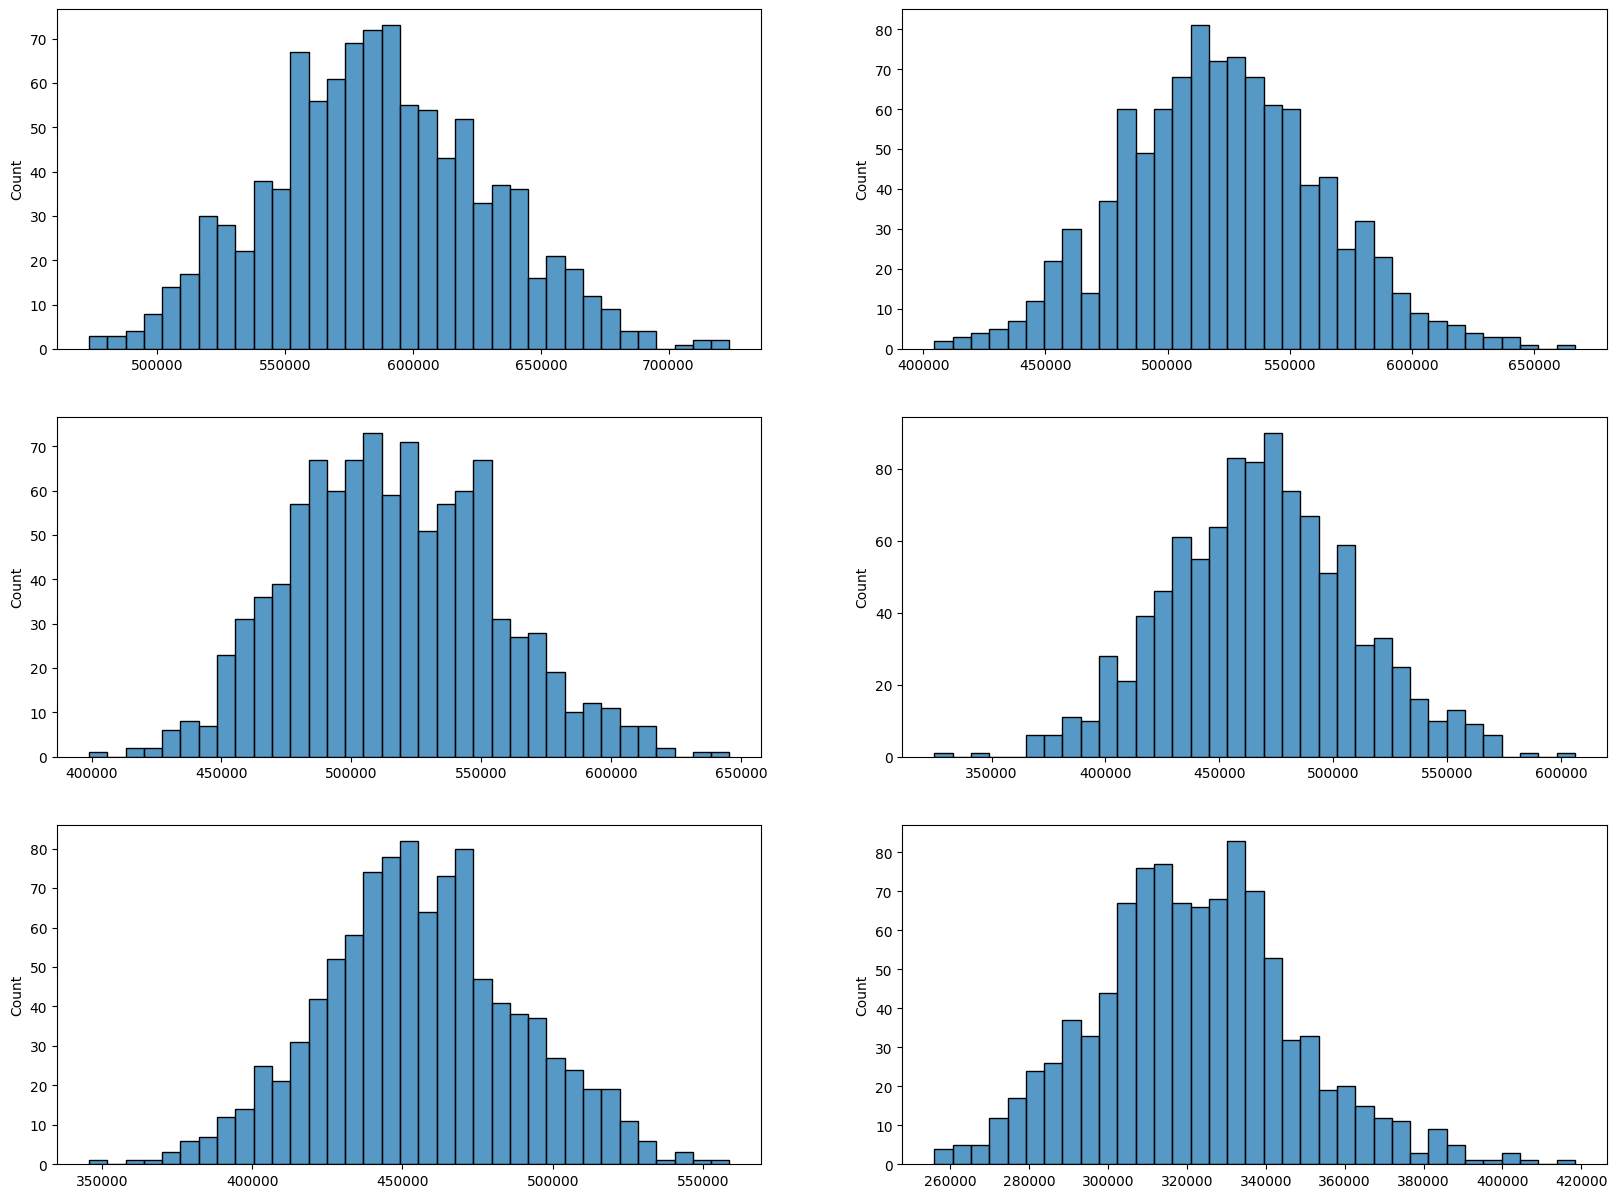

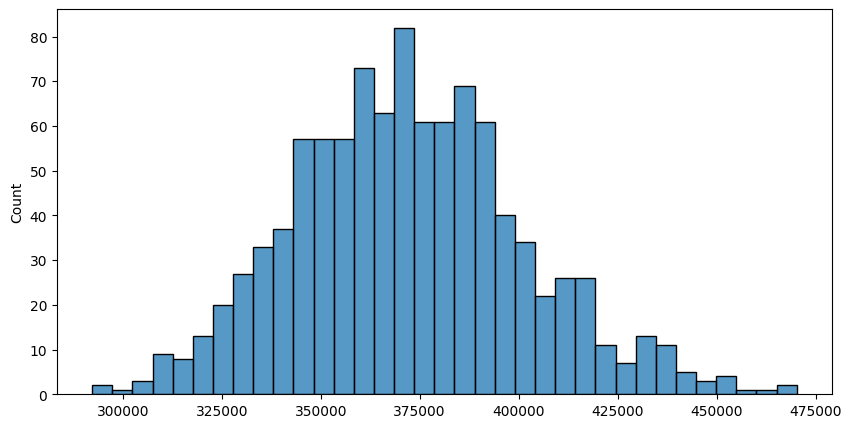

In [104]:
sample_size = 200
num_repitions = 1000
all_sample_means = {}
age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
for i in age_intervals:
  all_sample_means[i] = []

for i in age_intervals:
  for j in range(num_repitions):
    mean= avgamt_age[avgamt_age['Age']==i].sample(sample_size, replace=True)['Purchase'].mean()
    all_sample_means[i].append(mean)

fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))

sns.histplot(all_sample_means['26-35'],bins=35,ax=axis[0,0])
sns.histplot(all_sample_means['36-45'],bins=35,ax=axis[0,1])
sns.histplot(all_sample_means['18-25'],bins=35,ax=axis[1,0])
sns.histplot(all_sample_means['46-50'],bins=35,ax=axis[1,1])
sns.histplot(all_sample_means['51-55'],bins=35,ax=axis[2,0])
sns.histplot(all_sample_means['55+'],bins=35,ax=axis[2,1])


plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(all_sample_means['0-17'],bins=35)
plt.show()



Observations:

The means sample seems to be normally distributed for all age groups. Also, we can see the mean of the sample means are closer to the population mean as per central limit theorem.



Calculating 90% confidence interval for avg expenses for different age groups for sample size 200:


In [106]:
Z_value_90_perc=norm.ppf(0.90)
Z_value_90_perc

np.float64(1.2815515655446004)

In [109]:
sample_size = 200
num_repitions=1000

all_population_means={}
all_sample_means={}

age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
for i in age_intervals:
  all_sample_means[i] = []
  all_population_means[i]=[]
  population_mean=avgamt_age[avgamt_age['Age']==i]['Purchase'].mean()
  all_population_means[i].append(population_mean)

print("All age group population mean: \n", all_population_means)
print("\n")

for i in age_intervals:
  for j in range(num_repitions):
    mean = avgamt_age[avgamt_age['Age']==i].sample(sample_size, replace=True)['Purchase'].mean()
    all_sample_means[i].append(mean)

for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:
  new_df = avgamt_age[avgamt_age['Age']==val]

  std_error = Z_value_90_perc*new_df['Purchase'].std()/np.sqrt(len(new_df))
  sample_mean = new_df['Purchase'].mean()
  lower_lim = sample_mean - std_error
  upper_lim = sample_mean + std_error


  print("For age {} confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))




All age group population mean: 
 {'26-35': [np.float64(587060.3404773502)], '36-45': [np.float64(523080.13110539847)], '18-25': [np.float64(515146.50046772684)], '46-50': [np.float64(468433.84934086626)], '51-55': [np.float64(456169.2577962578)], '55+': [np.float64(321870.1102150538)], '0-17': [np.float64(373180.84403669724)]}


For age 26-35 confidence interval of means: (569509.56, 604611.12)
For age 36-45 confidence interval of means: (500998.17, 545162.09)
For age 18-25 confidence interval of means: (493788.99, 536504.01)
For age 46-50 confidence interval of means: (437536.59, 499331.11)
For age 51-55 confidence interval of means: (428439.85, 483898.66)
For age 55+ confidence interval of means: (297423.20, 346317.02)
For age 0-17 confidence interval of means: (336390.64, 409971.05)


Calculating 95% confidence interval for avg expenses for different age groups for sample size 200:

In [110]:
Z_value_95_perc=norm.ppf(0.95)
Z_value_95_perc

np.float64(1.6448536269514722)

In [113]:
sample_size = 200
num_repitions = 1000

all_means = {}
age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
for i in age_intervals:
  all_means[i] = []

for i in age_intervals:
  for j in range(num_repitions):
    mean= avgamt_age[avgamt_age['Age']==i].sample(sample_size, replace=True)['Purchase'].mean()
    all_means[i].append(mean)
  for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:

    new_df = avgamt_age[avgamt_age['Age']==val]
    std_error = Z_value_95_perc*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim - sample_mean - std_error
    upper_lim = sample_mean + std_error

print("For age {} confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))



For age 0-17 confidence interval of means: (336390.64, 420400.56)


Calculating 99% confidence interval for avg expenses for different age groups for sample size 200:

In [114]:
Z_value_99_perc=norm.ppf(0.99)
Z_value_99_perc

np.float64(2.3263478740408408)

In [117]:
sample_size = 200
num_repitions - 1000
all_means = {}

age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
for i in age_intervals:
  all_means[i] = []

for i in age_intervals:
  for j in range(num_repitions):
    mean = avgamt_age[avgamt_age['Age']==i].sample(sample_size, replace=True)['Purchase'].mean()
    all_means[i].append(mean)
for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:

  new_df = avgamt_age[avgamt_age['Age']==val]
  std_error = Z_value_99_perc*new_df['Purchase'].std()/np.sqrt(len(new_df))
  sample_mean = new_df['Purchase'].mean()
  lower_lim = sample_mean - std_error
  upper_lim - sample_mean + std_error


  print("For age {} confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))



For age 26-35 confidence interval of means: (555201.13, 420400.56)
For age 36-45 confidence interval of means: (482995.65, 420400.56)
For age 18-25 confidence interval of means: (476377.09, 420400.56)
For age 46-50 confidence interval of means: (412347.33, 420400.56)
For age 51-55 confidence interval of means: (405833.21, 420400.56)
For age 55+ confidence interval of means: (277492.64, 420400.56)
For age 0-17 confidence interval of means: (306397.10, 420400.56)


Observation
1. We can see the sample means are closer to the population mean for the differnt age groups. And, with greater confidence interval we have the upper limit and lower limit range increases. As we have seen for gender and marital status, by increasing the sample size we can have the mean of the sample means closer to the population.


Recommendations
1.	Men spent more money than women, company can focus on retaining the male customers and getting more male customers.
2.	Product_Category - 1, 5, 8 have highest purchasing frequency. it means these are the products in these categories are in more demand. Company can focus on selling more of these products.
3.	Unmarried customers spend more money than married customers, So company should focus on acquisition of Unmarried customers.
4.	Customers in the age 26-35 spend more money than the others, So company should focus on acquisition of customers who are in the age 26-35.
5.	We have more customers aged 26-35 in the city category B and A, company can focus more on these customers for these cities to increase the business.
6.	Male customers living in City_Category C spend more money than other male customers living in B or C, Selling more products in the City_Category C will help the company increase the revenue.
7.	Some of the Product category like 19,20,13 have very less purchase. Company can think of dropping it.

8.	The top 10 users who have purchased more company should give more offers and discounts so that they can be retained and can be helpful for companies business.
9.	The occupation which are contributing more company can think of offering credit cards or other benefits to those customers by liasing with some financial partners to increase the sales.
10.	The top products should be given focus in order to maintain the quality in order to further increase the sales of those products.
11.	People who are staying in city for an year have contributed to 35% of the total purchase amount. Company can focus on such customer base who are neither too old nor too new residents in the city.
12.	We have highest frequency of purchase order between 5k and 10k, company can focus more on these mid range products to increase the
sales.
